In [1]:
import tensorflow as tf
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))
if tf.test.gpu_device_name(): 

    print('Default GPU Device:{}'.format(tf.test.gpu_device_name()))
else:
   print("Please install GPU version of TF")

Num GPUs Available:  1
Default GPU Device:/device:GPU:0


In [2]:
from tensorflow import keras

base_model = keras.applications.VGG16(
    weights='imagenet',  # Load weights pre-trained on ImageNet.
    input_shape=(224, 224, 3),
    include_top=False)

In [3]:
base_model.trainable = False

In [4]:
inputs = keras.Input(shape=(224, 224, 3))
x = base_model(inputs, training=False)
x = keras.layers.GlobalAveragePooling2D()(x)
x = keras.layers.Dense(units = 512, activation='relu')(x)
outputs = keras.layers.Dense(units = 8, activation='softmax')(x)
model = keras.Model(inputs, outputs)

In [5]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 vgg16 (Functional)          (None, 7, 7, 512)         14714688  
                                                                 
 global_average_pooling2d (G  (None, 512)              0         
 lobalAveragePooling2D)                                          
                                                                 
 dense (Dense)               (None, 512)               262656    
                                                                 
 dense_1 (Dense)             (None, 8)                 4104      
                                                                 
Total params: 14,981,448
Trainable params: 266,760
Non-trainable params: 14,714,688
___________________________________________

In [6]:
model.compile(loss='categorical_crossentropy', 
              #optimizer='adam', 
              metrics='accuracy')

In [7]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Create a data generator
datagen_train = ImageDataGenerator(
    samplewise_center=True,  # set each sample mean to 0
    rotation_range=10,  # randomly rotate images in the range (degrees, 0 to 180)
    width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
    height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
    horizontal_flip=True,  # randomly flip images
    vertical_flip=False,
    validation_split=0.2
)


In [8]:
# load and iterate training dataset
train_it = datagen_train.flow_from_directory(
    "D:\\the-nature-conservancy-fisheries-monitoring2\\train",
    target_size=(224, 224),
    color_mode="rgb",
    class_mode="categorical",
    batch_size=64,
    subset='training'
)

# load and iterate validation dataset
valid_it = datagen_train.flow_from_directory(
    "D:\\the-nature-conservancy-fisheries-monitoring2\\train",
    target_size=(224, 224),
    color_mode="rgb",
    class_mode="categorical",
    batch_size=64,
    subset='validation'
)

Found 3025 images belonging to 8 classes.
Found 752 images belonging to 8 classes.


In [9]:
from sklearn.utils import class_weight 
import numpy as np

class_weights = class_weight.compute_class_weight(
    class_weight='balanced',
    classes=np.unique(train_it.classes), 
    y=train_it.classes)

train_class_weights = dict(enumerate(class_weights))

In [10]:
print(train_class_weights)

{0: 0.27480014534883723, 1: 2.36328125, 2: 4.022606382978723, 3: 7.002314814814815, 4: 1.0164650537634408, 5: 1.5755208333333333, 6: 2.6817375886524824, 7: 0.6430697278911565}


In [11]:
import tensorflow as tf
es_callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)

model.fit(train_it, steps_per_epoch=train_it.samples/train_it.batch_size, 
          validation_data=valid_it, validation_steps=valid_it.samples/valid_it.batch_size, epochs=20, callbacks=[es_callback], class_weight=train_class_weights)

Epoch 1/20
47/47 [==============================] - 39s 661ms/step - loss: 4.2165 - accuracy: 0.3068 - val_loss: 1.2358 - val_accuracy: 0.5652
Epoch 2/20
47/47 [==============================] - 33s 689ms/step - loss: 1.4890 - accuracy: 0.4602 - val_loss: 1.4978 - val_accuracy: 0.5678
Epoch 3/20
47/47 [==============================] - 32s 688ms/step - loss: 1.0654 - accuracy: 0.5388 - val_loss: 2.9145 - val_accuracy: 0.4229
Epoch 4/20
47/47 [==============================] - 32s 688ms/step - loss: 0.8220 - accuracy: 0.6149 - val_loss: 1.4075 - val_accuracy: 0.5319


In [12]:
base_model.trainable = True

model.compile(optimizer=keras.optimizers.RMSprop(learning_rate = .00001),  # Very low learning rate
              loss='categorical_crossentropy',
              metrics='accuracy')

In [13]:
import tensorflow as tf
es_callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)

model.fit(train_it, steps_per_epoch=train_it.samples/train_it.batch_size, validation_data=valid_it, validation_steps=valid_it.samples/valid_it.batch_size, epochs=20, callbacks=[es_callback],class_weight=train_class_weights)

Epoch 1/20
47/47 [==============================] - 36s 684ms/step - loss: 0.4284 - accuracy: 0.7795 - val_loss: 0.7416 - val_accuracy: 0.7566
Epoch 2/20
47/47 [==============================] - 33s 698ms/step - loss: 0.2849 - accuracy: 0.8324 - val_loss: 0.5551 - val_accuracy: 0.8285
Epoch 3/20
47/47 [==============================] - 33s 691ms/step - loss: 0.2312 - accuracy: 0.8602 - val_loss: 0.5256 - val_accuracy: 0.8351
Epoch 4/20
47/47 [==============================] - 33s 695ms/step - loss: 0.1920 - accuracy: 0.8840 - val_loss: 0.4887 - val_accuracy: 0.8484
Epoch 5/20
47/47 [==============================] - 33s 693ms/step - loss: 0.1563 - accuracy: 0.9012 - val_loss: 0.5043 - val_accuracy: 0.8564
Epoch 6/20
47/47 [==============================] - 33s 692ms/step - loss: 0.1413 - accuracy: 0.9121 - val_loss: 0.3759 - val_accuracy: 0.8923
Epoch 7/20
47/47 [==============================] - 33s 689ms/step - loss: 0.1207 - accuracy: 0.9243 - val_loss: 0.3941 - val_accuracy: 0.8870

In [13]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from tensorflow.keras.preprocessing import image as image_utils
from tensorflow.keras.applications.imagenet_utils import preprocess_input

def show_image(image_path):
    image = mpimg.imread(image_path)
    plt.imshow(image)

def make_predictions(image_path):
    show_image(image_path)
    image = image_utils.load_img(image_path, target_size=(224, 224))
    image = image_utils.img_to_array(image)
    image = image.reshape(1,224,224,3)
    image = preprocess_input(image)
    preds = model.predict(image)
    return preds

'ALB'

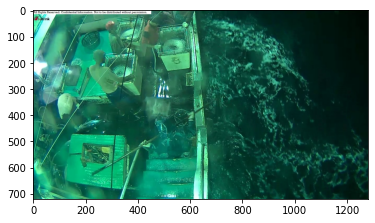

In [14]:
import numpy as np
#prediction = make_predictions('C:\\programowanie\\RYBY2\\train\\ALB\\img_00032.jpg')
prediction = make_predictions('D:\\the-nature-conservancy-fisheries-monitoring\\train\\ALB\\img_00019.jpg')
ryby = ['ALB', 'BET', 'DOL', 'LAG', 'NoF', 'OTHER', 'SHARK', 'YFT']
ryby[np.argmax(prediction)]

In [14]:
model.save('vgg16_fish_model_after_color_equalization_batch_64_class_weights')

INFO:tensorflow:Assets written to: vgg16_fish_model_after_color_equalization_batch_64_class_weights\assets


In [15]:
model.evaluate(valid_it, steps=valid_it.samples/valid_it.batch_size)

11/11 [==============================] - 7s 520ms/step - loss: 0.3069 - accuracy: 0.9202


[0.3069271743297577, 0.9202127456665039]